In [1]:
import pandas as pd
import numpy as np
import re
import string
# import word tokenize from pythainlp
from pythainlp import word_tokenize

# Load the main dataset

In [2]:
df_main_crime_dataset = pd.read_csv('../Data/THR_DLR_CLA_V2_Primary_Full_EA.csv')
df_main_crime_dataset

,News Title,News_Intro,News_Desc,News_All,Gambling,Murder,Sexual Abuse,Theft/Burglary,Drug,Battery/Assault,Accident,Non-Crime
0,ตร.นนท์จับหนุ่มแท็กซี่ขโมยเนื้อหมูของร้านตามสั...,ตำรวจ สภ.รัตนาธิเบศร์ จับกุมโชเฟอร์แท็กซี่ตามห...,ตำรวจ สภ.รัตนาธิเบศร์ จับกุมโชเฟอร์แท็กซี่ตามห...,ตร.นนท์จับหนุ่มแท็กซี่ขโมยเนื้อหมูของร้านตามสั...,0,0,0,1,0,0,0,0
1,"ครอบครัว ""ฮ้อแสงชัย"" เชื่อคดี ""เบนซ์ชนฟอร์ด"" จ...",น้องสาวและครอบครัวฮ้อแสงชัย ขอบคุณกระบวนการยุต...,น้องสาวและครอบครัวฮ้อแสงชัย ขอบคุณกระบวนการยุต...,"ครอบครัว ""ฮ้อแสงชัย"" เชื่อคดี ""เบนซ์ชนฟอร์ด"" จ...",0,0,0,0,0,0,1,0
2,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,0,0,0,0,0,0,0,1
3,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,0,1,0,0,1,0,0,0
4,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8562,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,รองโฆษก ตร.แจงกรณีสื่อแฉดาราสร้างเรื่องหลอกลวง...,ตร.แจง ดารากุเรื่องเป็นเซียนหวย อาจเข้าข่ายผิด...,0,0,0,0,0,0,0,1
8563,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,พบศพหนุ่มวัย 22 ปี ถูกยิงด้วยปืน 9 มม. ตาย 1 ศ...,หนุ่มชาวบ้านที่ถูกยิงดับใต้สะพานที่บาเจาะ ตร.ค...,0,1,0,0,1,1,0,0
8564,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สน.สายไหม นำทีมข้าราชการตำรวจในสังกัด และเ...,ผกก.สายไหม มอบสิ่งของผู้สูงอายุ เนื่องในวันเฉล...,0,0,0,0,0,0,0,1
8565,ในหลวงพระราชทานตราสัญลักษณ์ประจำหน่วยปฏิบัติกา...,พล.ต.ต.จิรภพ ภูริเดช ผบก.ป. พร้อมข้าราชการตำรว...,พล.ต.ต.จิรภพ ภูริเดช ผบก.ป. พร้อมข้าราชการตำรว...,ในหลวงพระราชทานตราสัญลักษณ์ประจำหน่วยปฏิบัติกา...,0,0,0,0,0,0,0,1


In [3]:
X = df_main_crime_dataset.iloc[:,3:4].values
Y_All_Label = df_main_crime_dataset.iloc[:,4:].values

# Clean text and Tokenize sentence into words

In [4]:
def clean_msg(msg):
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    msg = re.sub(r'<.*?>','', msg)
    # ลบ hashtag
    msg = re.sub(r'#','',msg)
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        msg = re.sub(r'\{}'.format(c),'',msg)
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    return msg

In [5]:
clean_text_arr = []
for i in range(len(X)):
    clean_text = clean_msg(X[i][0])
    clean_text_arr.append(clean_text)

In [6]:
arr = []
for i in range(len(X)):
    token = word_tokenize(clean_text_arr[i], keep_whitespace=False)
    arr.append(token)

# TFIDF

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
tokens_list_j = [','.join(tkn) for tkn in arr]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(analyzer=lambda x:x.split(','))
t_feat = tvec.fit_transform(tokens_list_j)

In [9]:
TFIDF_Data = t_feat.toarray()

# Train Gambling model

## Extract label from All labels

In [10]:
Y_gamble = df_main_crime_dataset['Gambling'].values

## Train_Test_Split

In [11]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.model_selection import iterative_train_test_split

In [12]:
Y_All_Label = np.array(Y_All_Label)
Y_All_Label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [32]:
Y_All_Label = np.array(Y_All_Label)
np.random.seed(42)
X_train, Y_train, X_test, Y_test = iterative_train_test_split(TFIDF_Data,Y_All_Label,test_size=0.2)

model = BernoulliNB()
model = MultiOutputClassifier(model)


In [33]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
X_test[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
model.fit(X_train,Y_train)

result = model.predict(X_test)

In [36]:
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]])

In [37]:
Labellist = ['Gambling','Murder','Sexual Abuse','Theft/Burglary','Drug','Battery/Assault','Accident','Non-Crime']

In [38]:
print(classification_report(Y_test, np.round(result),target_names=Labellist))

                 precision    recall  f1-score   support

       Gambling       0.40      0.12      0.18        50
         Murder       0.63      0.87      0.73       511
   Sexual Abuse       0.84      0.59      0.69       135
 Theft/Burglary       0.83      0.53      0.65       155
           Drug       0.82      0.62      0.70       208
Battery/Assault       0.48      0.79      0.60       378
       Accident       0.75      0.58      0.66       144
      Non-Crime       0.76      0.78      0.77       281

      micro avg       0.64      0.72      0.68      1862
      macro avg       0.69      0.61      0.62      1862
   weighted avg       0.68      0.72      0.68      1862
    samples avg       0.56      0.64      0.58      1862



/home/crimson/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/crimson/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each class
n_classes = len(df_main_crime_dataset.columns[5:])
print(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], result[:, i])
    roc_auc[i] = roc_auc_score(Y_test[:, i], result[:, i])

df_main_crime_dataset.columns[5:]

7


Index(['Murder', 'Sexual Abuse', 'Theft/Burglary', 'Drug', 'Battery/Assault',
       'Accident', 'Non-Crime'],
      dtype='object')

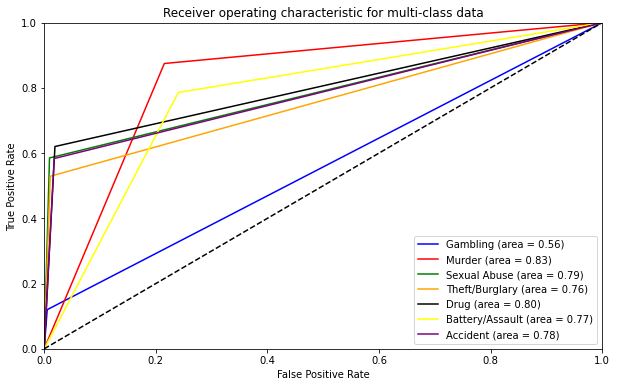

In [40]:
from itertools import cycle
import matplotlib.pyplot as plt
news_label = ['Gambling', 'Murder', 'Sexual Abuse', 'Theft/Burglary', 'Drug', 'Battery/Assault', 'Accident', 'Non-Crime']
colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'yellow', 'purple', 'pink', 'grey'])
plt.figure(figsize=(10,6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5, label=f'{news_label[i]} (area = {roc_auc[i]:.2f})')
#     plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5, label=f'ROC curve of class {news_label[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [41]:
from sklearn.metrics import multilabel_confusion_matrix
Confusion_Matrix_Result = multilabel_confusion_matrix(Y_test,result)

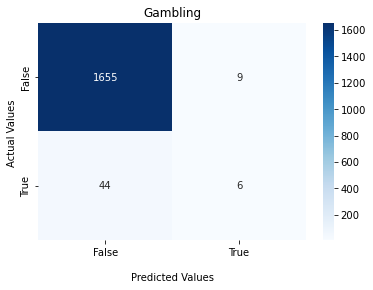

In [42]:
import seaborn as sns

ax = sns.heatmap(Confusion_Matrix_Result[0], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[0]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

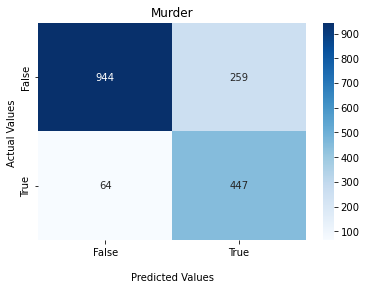

In [43]:
ax = sns.heatmap(Confusion_Matrix_Result[1], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[1]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

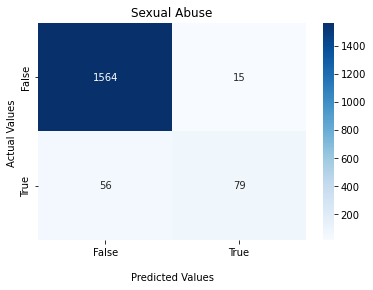

In [44]:
ax = sns.heatmap(Confusion_Matrix_Result[2], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[2]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

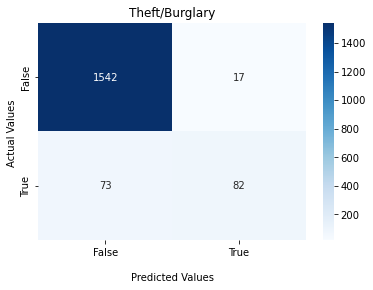

In [45]:
ax = sns.heatmap(Confusion_Matrix_Result[3], annot=True, cmap='Blues',fmt='g')

ax.set_title(news_label[3]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

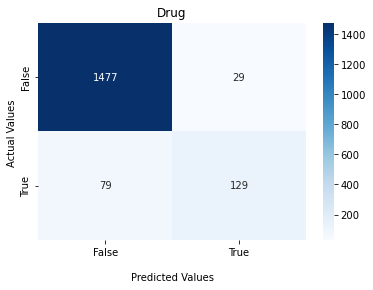

In [46]:
ax = sns.heatmap(Confusion_Matrix_Result[4], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[4]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

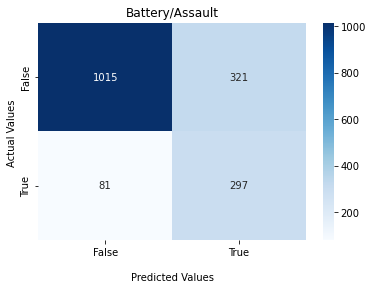

In [47]:
ax = sns.heatmap(Confusion_Matrix_Result[5], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[5]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

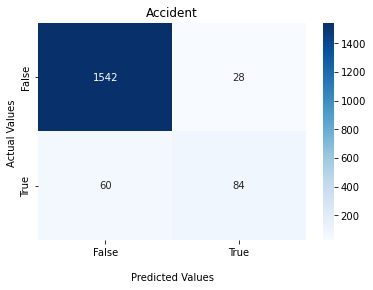

In [48]:
ax = sns.heatmap(Confusion_Matrix_Result[6], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[6]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

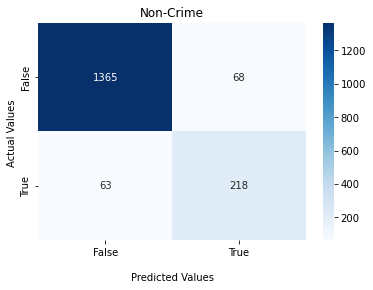

In [49]:
ax = sns.heatmap(Confusion_Matrix_Result[7], annot=True, cmap='Blues',fmt='g')

ax.set_title(Labellist[7]);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()